# Hypothesis testing problems

## Exercise 1

You are a nutritionist researching two different types of diets to see if there is a significant difference in weight loss after one month. You choose two random groups of people; one group follows the first diet, and the other follows the second. At the end of the month, you record the weight loss (in kg) for each person:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

With these data, it seeks to answer the following question: Is there a significant difference in average weight loss between people who followed the first diet and those who followed the second diet?

To draw conclusions, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the test to test the hypothesis. You can use a Student's t-test.
- Analyze the conclusions.

### Null hypothesis
The two types of diet give us the same average weight loss between people who followed the first diet and those who followed the second diet

### Alternative hypothesis
There is a significatn difference in average weight loss between people who followed the first diet and those who followed the second diet

In [6]:
# Librerías
from scipy import stats
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Datos
dieta_1 = [2.0, 2.5, 3.0, 2.8, 2.3, 2.7, 2.5]
dieta_2 = [3.0, 3.2, 3.1, 2.9, 2.8, 3.0, 3.2]

In [8]:
# Hypothesis testing
p_valor = stats.ttest_ind(dieta_1, dieta_2).pvalue
nivel_alpha = 0.05
print(p_valor)

if p_valor<nivel_alpha:
  print('Rechazamos la hipótesis nula de igualdad.')
  print('Existe evidencia significativa de que existe una diferencia entre los resultados de bajada de peso para las dietas 1 y 2')
else:
  print('No existe evidencia significativa como para rechazar la hipótesis nula y por lo tanto la tomamos como cierta.')

0.004083270191713912
Rechazamos la hipótesis nula de igualdad.
Existe evidencia significativa de que existe una diferencia entre los resultados de bajada de peso para las dietas 1 y 2


### Conclusiones
Vemos que se obtiene un p-valor mucho menor a 0.05 que sería nuestro límite permitido de error (alpha).
Como el p-valor es muy bajo, la probabilidad de obtener los resultados que tenemos como datos, teniendo la hipótesis nula como cierta, es muy pequeña, por lo tanto no podemos aceptar la hipótesis nula.

## ANOVA

**ANOVA** (*Analysis of Variance*) is a statistical technique used to compare the measures of two or more groups. The idea behind ANOVA is to decompose the total variability in the data into two components: between-group variability and within-group variability:

- **Between-group variability**: This variability refers to the differences between the group means. If this variability is considerably larger than the within-group variability, it could be an indication that at least one of the group means is different.
- **Within-group variability**: This variability refers to the dispersion of the data within each group. If all groups have similar variability, then any noticeable difference in group means could be considered significant.

Hypotheses in ANOVA typically include:

- **Null hypothesis** ($H₀$): The means of all groups are equal.
- **Alternative hypothesis** ($H₁$): At least one of the group means is different.

If the ANOVA test result is significant (e.g., a p-value less than a threshold such as 0.05), this suggests that at least one group mean is different.

## Exercise 2

A farmer decides to test three different types of fertilizers to determine if one is superior in terms of corn production. The farmer plants corn on 15 identical plots and uses all three fertilizers (5 plots for each type). At the end of the season, he measures the corn yield (in kg) of each plot, with the following result:

| Fertilizer 1 | Fertilizer 2 | Fertilizer 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

With this data, he seeks to answer the following question: Is there a significant difference in average corn yield between the three types of fertilizers?

To help you, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the ANOVA test.
- Analyze the conclusions.
- If one fertilizer is better than another, how can we know it?

### Null hypothesis
The corn yield means of all the Fertilizer are equal.

### Alternative hypothesis
At least one of the means is different.

(18.0, 34.0)

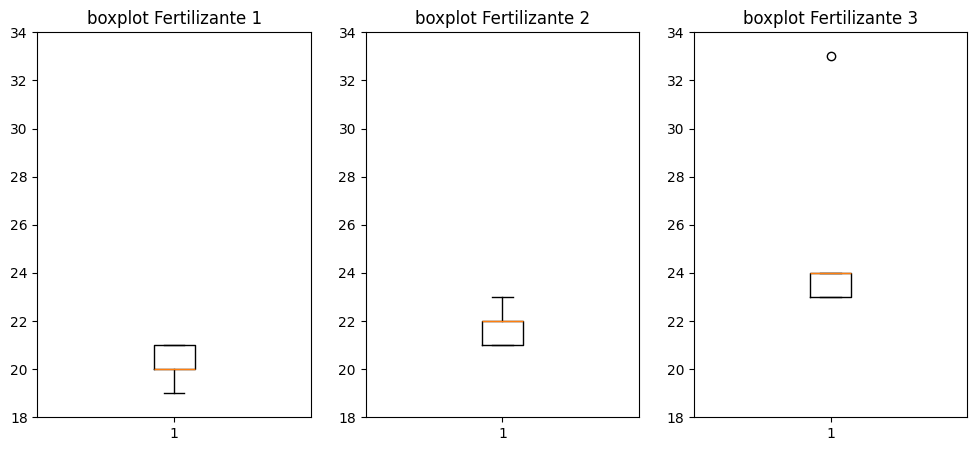

In [14]:
# Datos
fertilizer_1 = [20, 21, 20, 19, 20]
fertilizer_2 = [22, 21, 23, 22, 21]
fertilizer_3 = [24, 23, 33, 23, 24]

# Hacemos un boxplot previo para tener una vista general
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.boxplot(fertilizer_1)
plt.title('boxplot Fertilizante 1')
plt.ylim(18,34) # Limites en la y para ver las tres gráficas en el mismo intervalo
plt.subplot(1,3,2)
plt.boxplot(fertilizer_2)
plt.title('boxplot Fertilizante 2')
plt.ylim(18,34)
plt.subplot(1,3,3)
plt.boxplot(fertilizer_3)
plt.title('boxplot Fertilizante 3')
plt.ylim(18,34)

In [15]:
# ANOVA test
f_stat, p_value2 = stats.f_oneway(fertilizer_1, fertilizer_2, fertilizer_3)

print('Estadística F:', f_stat)
print('Valor p:', p_value2)

if p_value2 < nivel_alpha:
    print('Rechazamos la hipótesis nula: Al menos una de las medias es diferente.')
else:
    print('No rechazamos la hipótesis nula: Las medias son iguales.')

Estadística F: 0.42827687776141393
Valor p: 0.6612109789873731
No rechazamos la hipótesis nula: Las medias son iguales.
